In [1]:
import matplotlib.pyplot as plt
from scipy.stats import powerlaw
from scipy.stats import binom
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import networkx as nx
import random
import time
import pandas as pd
import math
import csv
import os

t0=time.time()
###########################################################
###########################################################
# Acordate que en casa los ldata tienen que empezar con Tests/
# En la facultad va directo el nombre del archivo
############################################################
############################################################

def scan(cant,lista):
    i=0
    for x in lista:
        print(x)
        i+=1
        if i>cant:
            break
            
def Tiempo():
    t1=time.time()
    print("Esto tardó {} segundos".format(t1-t0))


def ldata(archive):
        f = open(archive)
        data = []
        for line in f:
            col = line.split("\t")
            col = [x.strip() for x in col]
            data.append(col)
        return data 
    
# Vamos a leer los archivos con esta celda. Al darle la dirección de la carpeta Datos, lo que estoy sacando
# son los nombres de todos los archivos en esa carpeta.
#--------------------------------------------------------------------------

CarpCheck=[[root,files] for root,dirs,files in os.walk("./Datos")]

##############################################################################
# Los primero dos elementos de CarpCheck no les des bola, porque son
# la mismísma carpeta en la que estás y porque el segundo es ipynb checkpoints
# Eso es algo del notebook, no del TP.
##############################################################################

# El comentario anterior era considerando que no le daba la dirección correcta
# de la carpeta con mi información al os.walk. Esta vez le estoy pasando la 
# dirección exacta, así que no es necesario hacer tanto quilombo para separar
# los nombres de los archivos. El elemento en la posición x[1] es el nombre de la carpeta


for x in CarpCheck:
    # dada = x[0].split("\\")
    Archivos_Datos = [nombre for nombre in x[1]]
    Archivos_Datos.insert(0,x[0])

# Con esto tengo los nombres de todos los archivos en la carpeta de Datos
# Archivos_Datos tiene en la primer coordenada el principio de la dirección
# de la carpeta, y el resto de elementos son los archivos en la carpeta.
# Entonces si quiero buscar el objeto voy a tener que usar:
# Archivos_Datos[0]/Archivos_Datos[1]

#----------------------------------------------------------------------------

# Leo mi archivo

# Datos = ldata("{}/{}".format(Archivos_Datos[0],Archivos_Datos[1]))

# # Levanto los valores de N y T del nombre de mi archivo. Es importante recordar que mis
# # archivos tienen nombres de la forma: Datos_Evolucion_Opinion_N=$_T=$_K=$

# N = int(Archivos_Datos[1].split("_")[3].split("=")[1])
# T = int(Archivos_Datos[1].split("_")[4].split("=")[1])
# K = float(Archivos_Datos[1].split("_")[5].split("=")[1])

# # Hagamos un gráfico de estos datos. Por lo menos del caso K=0
# # Quiero hacer un gráfico en el que se vea que las opiniones van cayendo a cero.
# # La idea es hacer una sumatoria del valor cuadrado de las opiniones de cada uno.

# # Primero me armo una lista que tenga todos los valores que están en Datos sin ese
# # espacio que está en la primer coordenada. También estaría bueno pasar los strings
# # a floats.

# Opiniones = []
# for fila in Datos[5:len(Datos)]:
#     # Arranco desde 5 porque las primeras son títulos y las matrices de Adyacencia y Superposicion
#     fila2 = [float(x) for x in fila[1:len(fila)]]
#     Opiniones.append(fila2)
#     # Debería haber una forma más compacta de hacer esto. Quizás podría hacer una función de esto.
#     # La otra es meter un espacio en los títulos también, para al levantar datos eliminar
#     # eso de una también. Y luego el mismo Datos que tenga todos los números y listo.

# # Me armo los vectores X e Y que voy a graficar
# X = np.arange(0,len(Opiniones))
# Y1 = []
# Y2 = []
# for i in range(len(Opiniones)):
#     # Obtengo los valores cuadrados de todos los tópicos
#     T0 = [t**2 for t in Opiniones[i][0:len(Opiniones[i]):T]]
#     T1 = [t**2 for t in Opiniones[i][1:len(Opiniones[i]):T]]
#     # Ahora los sumo y los agrego a mis vectores Y
#     Y1.append(np.sum(T0)/len(T0))
#     Y2.append(np.sum(T1)/len(T1))

    
# plt.figure(figsize=(15,6))
# plt.plot(X,Y1, "--b",label="Topico 1" ,linewidth = 3)
# plt.plot(X,Y2, "--r",label="Topico 2" ,linewidth = 3)
# plt.rcParams.update({'font.size': 18})
# plt.xlabel("Iteraciones")
# plt.ylabel("Promedio de Opiniones Cuadradas")
# plt.title("Evolución de las opiniones")
# plt.legend()
# plt.grid()
# plt.show()


Tiempo()

Esto tardó 0.0010111331939697266 segundos


In [5]:
t0 = time.time()

#----------------------------------------------------------------------------------------------

Datos = ldata("Valores_Gaussiana")
Gaussiana = np.array([float(x) for x in Datos[0][1::]])


plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(20,12))
plt.hist(Gaussiana,bins = 400)
plt.show()

print("El promedio es: ",np.mean(Gaussiana))
print("La varianza es: ",np.var(Gaussiana))



#---------------------------------------------------------------------------------

Tiempo()

FileNotFoundError: [Errno 2] No such file or directory: 'Valores_Gaussiana'

In [4]:
t0 = time.time()

# Acá voy a hacer el histograma de cantidad de ciclos realizados para una serie de cuentas simples
# versus una serie de cuentas complejas. La idea es ver si hay una ganancia de tiempo al realizar
# cuentas simples de multiplicación, división, suma y resta versus cálculos de tanh.

# Datos = ldata("Datos_Opiniones_alfa=0.10_Cdelta=1.00_N=1000_Iter=0")
# Y = np.zeros(len(Datos[1][1::]))

# Y[::] = Datos[1][1::]
# X = np.arange(0,len(Y))*0.1


# plt.rcParams.update({'font.size': 18})
# plt.figure(figsize=(20,12))
# plt.semilogx(X,Y,"--",linewidth = 7)
# plt.xlabel("Tiempo del sistema")
# plt.ylabel("Variación Promedio")
# plt.grid()
# plt.annotate(r"$\alpha$=0.10,cos($\delta$)=1.00,N=1000", xy=(0.75,0.95),xycoords='axes fraction',fontsize=20,bbox=dict(facecolor='White', alpha=0.7))
# # plt.legend()
# plt.show()

print(type(graph1))



Tiempo()

<class 'networkx.classes.graph.Graph'>
Esto tardó 0.0010001659393310547 segundos


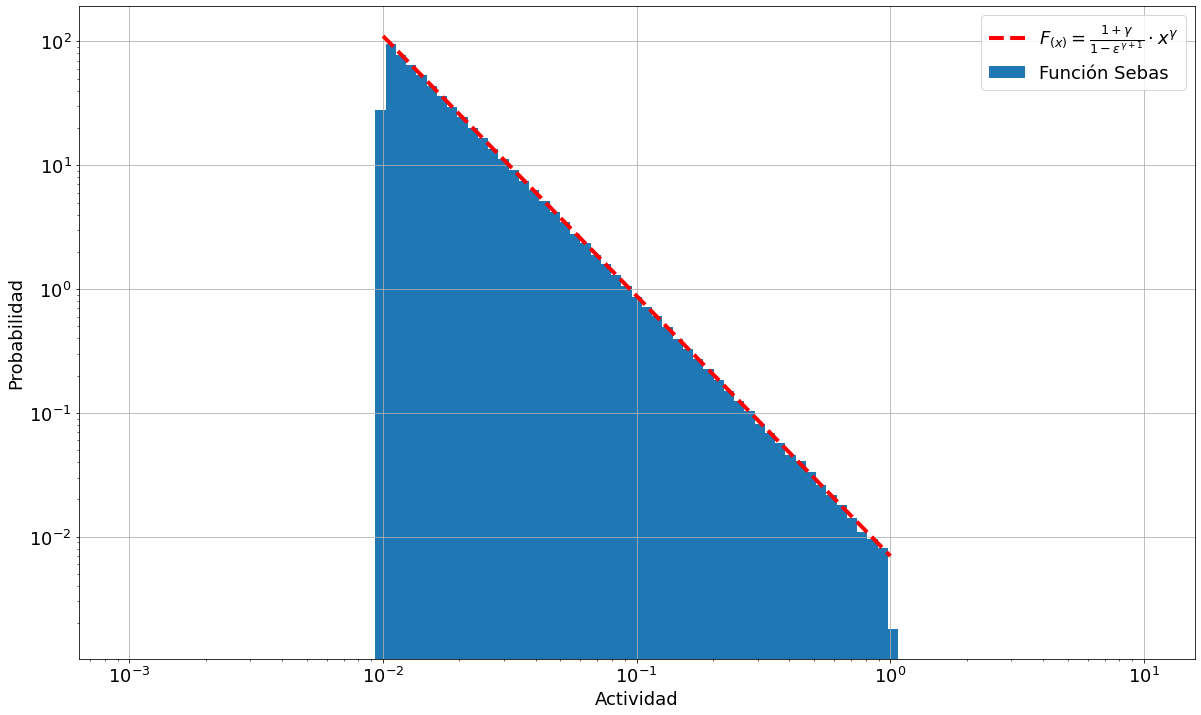

Esto tardó 1.8399581909179688 segundos


In [8]:
# Vamos a comprobar si la función que armé me genera distribuciones de actividad que sigan el comportamiento
# de una Powelaw

t0 = time.time()


#--------------------------------------------------------------------------------------------

# Levanto los datos del archivo original y separo los datos en tres listas.
# Una para la matriz de Adyacencia, una para la matriz de superposición y una para los vectores de opiniones

Datos = ldata("Distribucion_Powerlaw.txt")
Distribucion = np.zeros(len(Datos[0][1::]))
Distribucion[::] = Datos[0][1::]

Histo,Bins = np.histogram(Distribucion,bins=np.arange(0.01,1.01,0.01))

density_function = lambda x,epsilon,gamma: ((1+gamma)/(1-epsilon**(gamma+1)))*(x**gamma)

X = np.arange(0.01,1.01,0.01)


plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(20,12))
plt.xlabel("Actividad")
plt.ylabel("Probabilidad")
plt.hist(Distribucion,bins = np.logspace(-3,1,100),log = True,density = True, label = "Función Sebas")
plt.loglog(X,[density_function(x,0.01,-2.1) for x in X],"--",color = "red",
           label= r'$F_{(x)} = \frac{1+\gamma}{1-\varepsilon^{\gamma+1}}\cdot x^{\gamma}$', linewidth = 4)
plt.legend()
plt.xscale("log")
plt.grid()
plt.show()





Tiempo()

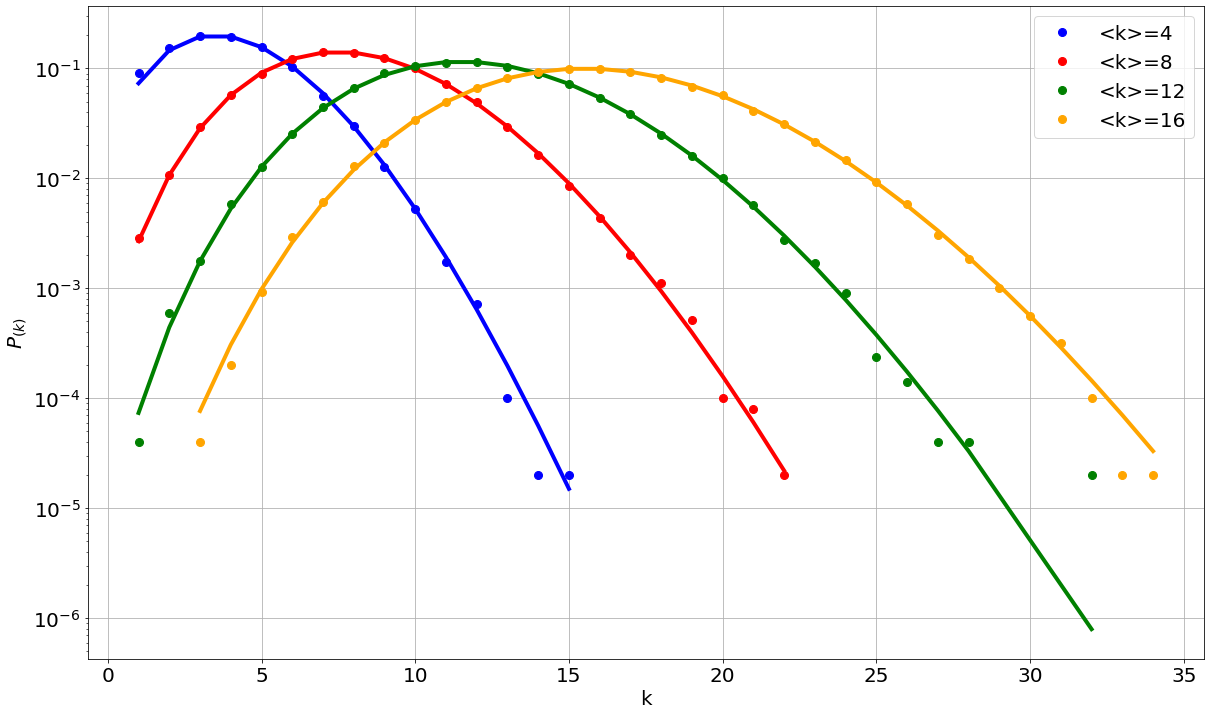

Esto tardó 708.798811674118 segundos


In [7]:
# En esta celda vamos a ir probando y empezar a armar la función para crear las redes de adyacencia
# que le voy a pasar al código de C para después correr distintas redes.
t0 = time.time()

#-------------------------------------------------------------------------------------------------

# Primero voy a crear redes de Erdós-Renyi. La idea para arrancar es armar redes de 1000 agentes,
# comprobar que las redes sean conexas y estudiar su matriz de Adyacencia. Así que
# la idea es armar un programa que arme redes para grados medios 4,8,12,16

# Armo la red usando el comando de Erdos-Renyi. Ya vi que esto funciona. Ahora voy a colocar
# unos for para iterar esto para varios grados medios. No calculo para varios valores de N
# Porque sino esto no terminaría más. Cambiar esto cuando lo pase a las pcs de la facultad.

for N in [50000]:
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize = (20,12))
    for gmedio,color in zip([4,8,12,16],["blue","red","green","orange"]):
        for elemento in range(1):
            probabilidad = gmedio/(N-1)
            graph1 = nx.erdos_renyi_graph(n=N,p=probabilidad)

            #--------------------------------------------------------------------------------------------------

            # Ahora me encargo de forzar la red a ser conexa. Para eso miro cuantas componentes conectadas hay.
            # Si hay más de una, primero me construyo una lista con todos los conjuntos, colocando el más grando de todos
            # al principio. Después, los enlaces que voy a agregar, tomando un sujeto al azar de la componente gigante
            # y un sujeto al azar de esos conjuntos libres que quedaron. Por otro lado, me armo una lista de enlaces
            # a remover, tomados de los enlaces de la componente Gigante original. Definidos los enlaces que voy a
            # agregar y los que voy a remover, los agrego y remuevo. Si me quedó todo conectado, genial, avanzo.
            # Sino, vuelvo a hacer el mismo proceso hasta que me quede todo conectado.

            while(len(list(nx.connected_components(graph1))) != 1 ):
                # Me armo la lista de componentes colocando primero al más grande
                Componentes = [list(c) for c in sorted(nx.connected_components(graph1), key=len, reverse=True)]
            #             print("Tamaño al empezar: ",len(Componentes))

                # Armo las listas de tuplas de enlaces para agregar y remover

                Enlaces_Agregar = [(random.choice(Componentes[0]),random.choice(conjunto)) for conjunto in Componentes[1::]]
                Enlaces_Remover = random.sample(list(graph1.edges(Componentes[0])),len(Componentes[1::]))

                # Agrego y remuevo enlaces

                graph1.add_edges_from(Enlaces_Agregar)
                graph1.remove_edges_from(Enlaces_Remover)

            #             print("Tamaño al terminar: ",len(list(nx.connected_components(graph))))

            #----------------------------------------------------------------------------------------------------

            # Una vez que tengo la red correctamente armada, ahora necesito obtener la matriz de adyacencia
            # como algo que después pueda pasar a C. Supongo que tenerla como un archivo txt sería lo mejor.
            # ¿O puedo levantar correctamente CSV en C? Creo que cualquier programa que levanta texto
            # levanta CSV.

#             Adyacencia = nx.to_numpy_matrix(graph)
#             np.savetxt("./MARE/Erdos-Renyi/ErdosRenyi_N={}_Gm={}_ID={}.txt".format(N,gmedio,elemento),Adyacencia,fmt = "%d", delimiter = "\t", newline = "\t")

# Con esto me guardo la matriz como un txt con una única fila y todos los elementos son
# enteros.

#------------------------------------------------------------------------------------------------------

# Esto ya me arma mis redes de Erdos Renyi correctamente. Ahora agrego debajo lo mismo pero para 
# redes de Barabassi y redes random regulars

#------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------


# Acá hago lo mismo exacto que antes, pero para redes de Barabassi
        
# for N in [50000]:
#     plt.rcParams.update({'font.size': 20})
#     plt.figure(figsize = (20,12))
#     for gmedio,color in zip([4,8,12,16],["blue","red","green","orange"]):
#         for elemento in range(1):
#             graph2 = nx.barabasi_albert_graph(n=N,m=int(gmedio/2))

#             #--------------------------------------------------------------------------------------------------

#             # Ahora me encargo de forzar la red a ser conexa. Para eso miro cuantas componentes conectadas hay.
#             # Si hay más de una, primero me construyo una lista con todos los conjuntos, colocando el más grando de todos
#             # al principio. Después, los enlaces que voy a agregar, tomando un sujeto al azar de la componente gigante
#             # y un sujeto al azar de esos conjuntos libres que quedaron. Por otro lado, me armo una lista de enlaces
#             # a remover, tomados de los enlaces de la componente Gigante original. Definidos los enlaces que voy a
#             # agregar y los que voy a remover, los agrego y remuevo. Si me quedó todo conectado, genial, avanzo.
#             # Sino, vuelvo a hacer el mismo proceso hasta que me quede todo conectado.

#             while(len(list(nx.connected_components(graph2))) != 1 ):
#                 # Me armo la lista de componentes colocando primero al más grande
#                 Componentes = [list(c) for c in sorted(nx.connected_components(graph2), key=len, reverse=True)]
#             #     print("Tamaño al empezar: ",len(Componentes))

#                 # Armo las listas de tuplas de enlaces para agregar y remover

#                 Enlaces_Agregar = [(random.choice(Componentes[0]),random.choice(conjunto)) for conjunto in Componentes[1::]]
#                 Enlaces_Remover = random.sample(list(graph2.edges(Componentes[0])),len(Componentes[1::]))

#                 # Agrego y remuevo enlaces

#                 graph2.add_edges_from(Enlaces_Agregar)
#                 graph2.remove_edges_from(Enlaces_Remover)
#             #     print("Tamaño al terminar: ",len(list(nx.connected_components(graph))))

            #----------------------------------------------------------------------------------------------------

            # Una vez que tengo la red correctamente armada, ahora necesito obtener la matriz de adyacencia
            # como algo que después pueda pasar a C. Supongo que tenerla como un archivo txt sería lo mejor.
            # ¿O puedo levantar correctamente CSV en C? Creo que cualquier programa que levanta texto
            # levanta CSV.

#             Adyacencia = nx.to_numpy_matrix(graph)
#             np.savetxt("./MARE/Barabasi/Barabasi_N={}_Gm={}_ID={}.txt".format(N,gmedio,elemento),Adyacencia,fmt = "%d", delimiter = "\t", newline = "\t")

            # Con esto me guardo la matriz como un txt con una única fila y todos los elementos son
            # enteros.

            #------------------------------------------------------------------------------------------------------

# Esto ya me arma mis redes de Barabasi correctamente. Ahora agrego debajo lo mismo pero para 
# redes random regulars

        
#------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------


# Acá hago lo mismo exacto que antes, pero para redes random regular
        
# for N in [50000]:
#     for gmedio in [12]: #[4,8,12,16]:
#         for elemento in range(1):
#             graph3 = nx.random_regular_graph(d=gmedio,n=N)

#             #--------------------------------------------------------------------------------------------------

#             # Ahora me encargo de forzar la red a ser conexa. Para eso miro cuantas componentes conectadas hay.
#             # Si hay más de una, primero me construyo una lista con todos los conjuntos, colocando el más grando de todos
#             # al principio. Después, los enlaces que voy a agregar, tomando un sujeto al azar de la componente gigante
#             # y un sujeto al azar de esos conjuntos libres que quedaron. Por otro lado, me armo una lista de enlaces
#             # a remover, tomados de los enlaces de la componente Gigante original. Definidos los enlaces que voy a
#             # agregar y los que voy a remover, los agrego y remuevo. Si me quedó todo conectado, genial, avanzo.
#             # Sino, vuelvo a hacer el mismo proceso hasta que me quede todo conectado.

#             while(len(list(nx.connected_components(graph3))) != 1 ):
#                 # Me armo la lista de componentes colocando primero al más grande
#                 Componentes = [list(c) for c in sorted(nx.connected_components(graph3), key=len, reverse=True)]
#             #     print("Tamaño al empezar: ",len(Componentes))

#                 # Armo las listas de tuplas de enlaces para agregar y remover

#                 Enlaces_Agregar = [(random.choice(Componentes[0]),random.choice(conjunto)) for conjunto in Componentes[1::]]
#                 Enlaces_Remover = random.sample(list(graph3.edges(Componentes[0])),len(Componentes[1::]))

#                 # Agrego y remuevo enlaces

#                 graph3.add_edges_from(Enlaces_Agregar)
#                 graph3.remove_edges_from(Enlaces_Remover)
#             #     print("Tamaño al terminar: ",len(list(nx.connected_components(graph))))

#             #----------------------------------------------------------------------------------------------------

            # Una vez que tengo la red correctamente armada, ahora necesito obtener la matriz de adyacencia
            # como algo que después pueda pasar a C. Supongo que tenerla como un archivo txt sería lo mejor.
            # ¿O puedo levantar correctamente CSV en C? Creo que cualquier programa que levanta texto
            # levanta CSV.

#             Adyacencia = nx.to_numpy_matrix(graph)
#             np.savetxt("./MARE/Random Regulars/RandomR_N={}_Gm={}_ID={}.txt".format(N,gmedio,elemento),Adyacencia,fmt = "%d", delimiter = "\t", newline = "\t")

            # Con esto me guardo la matriz como un txt con una única fila y todos los elementos son
            # enteros.

            #------------------------------------------------------------------------------------------------------

# Esto ya me arma mis redes random regulars

        #---------------------------------------------------------------------------------------------------
    
        # Acabo de modificar este código para que me haga un gráfico con las distribuciones de cada red por separado
        # con los gráficos de los 4 grados medios

        # Me gustaría armar una distribución de grado que incluya el gráfico de Erdós-Renyi
        # y el de Barabasi para compararlos. Para obtener los grados puedo usar el nx.graph.
        # Para graficarlos armo listas con las probabilidades a graficar y lo grafico todo con
        # asteriscos.

        Grados1 = np.array([tupla[1] for tupla in graph1.degree()]) # Gráfico de Erdos-Renyi
#         Grados2 = np.array([tupla[1] for tupla in graph2.degree()]) # Gráfico Libre de Escala
        # Grados3 = np.array([tupla[1] for tupla in graph3.degree()]) # Gráfico de Random Regulars

        Y1 = []
        X1 = []
        
        for g in range(min(Grados1),max(Grados1)+1):
            y = np.count_nonzero(Grados1 == g)/N
            if y != 0:
                Y1.append(y)
                X1.append(g)
                
        
        plt.semilogy(X1,Y1, "o", markersize = 8,color=color ,label = "<k>={}".format(gmedio))
        # plt.loglog(np.arange(min(Grados2),max(Grados2)+1),Y2, "s", markersize = 12, color = "red", label = "Barabasi")
        # plt.loglog(np.arange(min(Grados3),max(Grados3)+1),Y3, "*", markersize = 12, color = "blue", label = "Random Regular")
        
        #---------------------------------------------------------------------------------------------------------------------
        
        # Me guardo los datos de la red de grado medio 12 Libre de Escala para usarlo para graficar
        # la fórmula analítica de la distribución de grado
    
        ############################################################################################################

        # Grafico además la distribución de grado para la red Erdos-renyi de grado medio 12

        Xd = list(set(Grados1))
        Xd.sort()
        fin = Y1.index(min(Y1))
        Yd = binom.pmf(Xd,50000-1,gmedio/(50000-1))
        plt.semilogy(Xd,Yd,color = color , linewidth=4)


        ###########################################################################################################

        # Grafico acá la distribución de grado para la red Libre de Escala de grado medio 12.

#         DistLE = lambda x,c: (2*c*(c+1))/(x*(x+1)*(x+2))
#         Xd = list(set(Grados2))
#         Xd.sort()
#         fin = Y1.index(min(Y1))
#         Yd = [DistLE(x,gmedio/2) for x in Xd[0:fin+10]]
#         plt.loglog(Xd[0:fin+10],Yd, color=color ,linewidth=4)

    
    ###########################################################################################################
    
    plt.xlabel("k")
    plt.ylabel(r"$P_{(k)}$")
#     plt.title("Distribución de Grado para redes Libres de Escala de tamaño N=50000")
    plt.legend(loc="upper right")
    plt.grid()
    plt.show()


#------------------------------------------------------------------------------------------------------

# Voy a hacer los dibujos de mis redes para la tesis

# nx.draw_networkx(graph1,node_size=50,linewidths=1.5)
# plt.show()


Tiempo()

In [2]:
A = np.arange(10)
B = A
A = "Cambié esto"

print(A)
print(B)

Cambié esto
[0 1 2 3 4 5 6 7 8 9]


In [9]:
t0 = time.time()

# def EstadoFinal(Lista):
    
#     # Tomo la lista y la convierto en array para trabajarla mejor
#     Array = np.array(Lista)
    
#     #----------------------------------------------------------
#     # Primero veo el caso de que hayan tendido a cero
    
#     ArrayAbs = np.absolute(Array)
#     if max(ArrayAbs)<0.1:
#         return "Consenso"
    
#     #----------------------------------------------------------
#     # Ahora veamos los otros dos casos. Primero voy a armar
#     # un array que tenga las opiniones del tópico 1, y otro
#     # con las opiniones del tópico 2.
    
#     ArrayT1 = Array[0:len(Array):2]
#     ArrayT2 = Array[1:len(Array):2]
    
#     ArrayProd = np.multiply(ArrayT1,ArrayT2)
#     for producto in ArrayProd[1:len(ArrayProd)-1]:
#         if producto*ArrayProd[0]<0:
#             return "Polarizacion"
    
#     return "Ideologico"


Tiempo()

[False False False ... False False False]
Esto tardó 0.14491581916809082 segundos


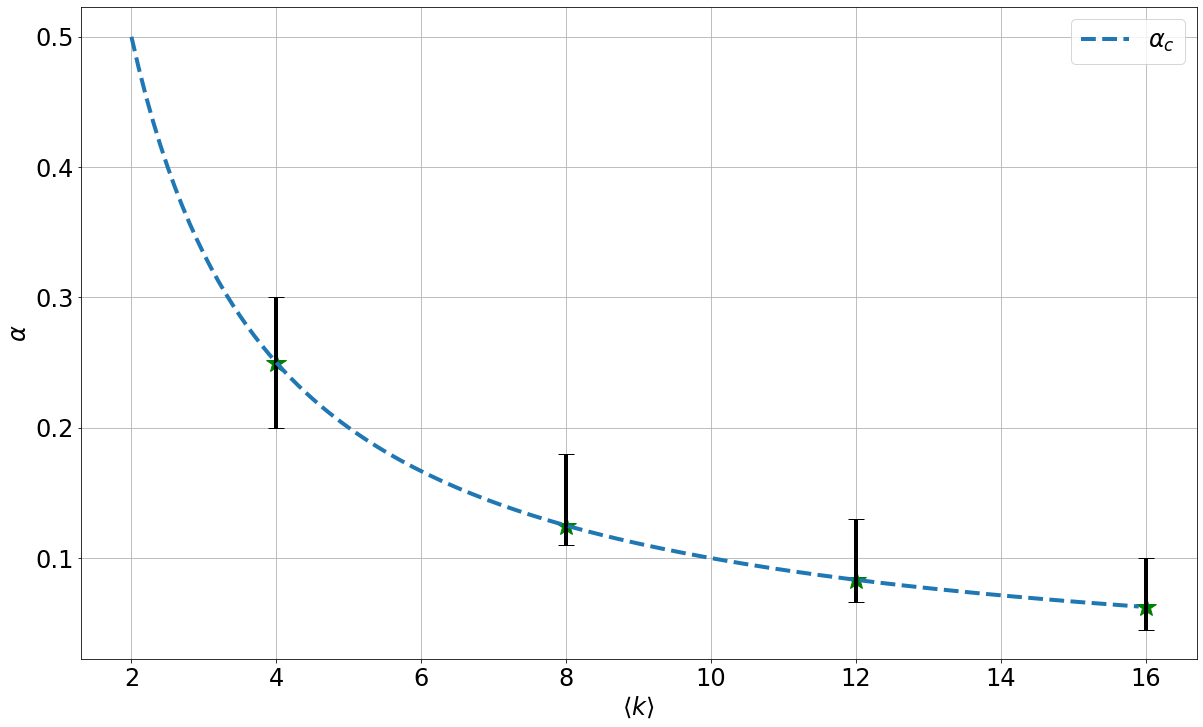

Esto tardó 0.2713496685028076 segundos


In [20]:
t0 = time.time()

# Acá voy a graficar el alfa crítico. Para eso defino primero mi función de AlfaC

# def AlfaC(x):
#     T = 2 # Número de tópicos
#     GM = 8 # Grado medio
#     K = 1 # Influencia social
#     if(x>0):
#         alfa = (T-1)/((GM*K)*(T-1+x))
#     else:
#         alfa = (T-1)/((GM*K)*(T-1-x))
#     return alfa

# Ya probé la función y ahora sí calcula perfecto. Hubo un pequeño
# error al principio.

#---------------------------------------------------------------------------

# def AlfaC(x):
#     T = 2 # Número de tópicos
#     GM = 8 # Grado medio
#     Cdelta = 0 # Cdelta
#     if(Cdelta>0):
#         alfa = (T-1)/((GM*x)*(T-1+Cdelta))
#     else:
#         alfa = (T-1)/((GM*x)*(T-1-Cdelta))
#     return alfa

#---------------------------------------------------------------------------

def AlfaC(x):
    T = 2 # Número de tópicos
    K = 1 # Influencia Social
    Cdelta = 0 # Cdelta
    if(Cdelta>0):
        alfa = (T-1)/((x*K)*(T-1+Cdelta))
    else:
        alfa = (T-1)/((x*K)*(T-1-Cdelta))
    return alfa

#------------------------------------------------------------------

# Defino mis vectores a graficar y armo el gráfico

# X = np.arange(0,1,0.01)
# Y = np.array([AlfaC(x) for x in X])

# plt.rcParams.update({'font.size': 24})
# plt.figure(figsize=(20,12))
# plt.plot(X,Y,"--",linewidth=4, label = r"$\alpha_c$")
# plt.plot(0.2,AlfaC(0.2),"or", markersize=10)
# plt.title("Curva de transición del sistema")
# plt.xlabel(r"cos($\delta$)")
# plt.ylabel(r"$\alpha$")
# plt.grid()
# plt.legend()
# plt.show()

#--------------------------------------------------------------------

# Armo el gráfico en función de K

# X = np.arange(1,10,0.1)
# Y = np.array([AlfaC(x) for x in X])

# # Armo la tabla de errores
# Er = np.zeros((2,4))
# Er[0,0] = abs(AlfaC(1)-0.112)
# Er[1,0] = abs(AlfaC(1)-0.124)
# Er[0,1] = abs(AlfaC(2)-0.056)
# Er[1,1] = abs(AlfaC(2)-0.061)
# Er[0,2] = abs(AlfaC(5)-0.022)
# Er[1,2] = abs(AlfaC(5)-0.025)
# Er[0,3] = abs(AlfaC(10)-0.011)
# Er[1,3] = abs(AlfaC(10)-0.012)

# Xk = [1,2,5,10]
# Yk = [AlfaC(k) for k in Xk]


# plt.rcParams.update({'font.size': 24})
# plt.figure(figsize=(20,12))
# plt.plot(X,Y,"--",linewidth=4, label = r"$\alpha_c$")
# plt.errorbar(Xk,Yk,yerr=Er,fmt="*", color = "green" , ecolor = "black", elinewidth = 4, capsize = 8, markersize=20, barsabove=True)
# # plt.title("Curva de transición del sistema")
# plt.xlabel("K")
# plt.ylabel(r"$\alpha$")
# plt.grid()
# plt.legend()
# plt.show()

#--------------------------------------------------------------------

# Armo el gráfico en función de Gm

X = np.arange(2,16,0.1)
Y = np.array([AlfaC(x) for x in X])

# Armo la tabla de errores
Er = np.zeros((2,4))
Er[0,0] = abs(AlfaC(4)-0.2)
Er[1,0] = abs(AlfaC(4)-0.3)
Er[0,1] = abs(AlfaC(8)-0.14)
Er[1,1] = abs(AlfaC(8)-0.18)
Er[0,2] = abs(AlfaC(12)-0.1)
Er[1,2] = abs(AlfaC(12)-0.13)
Er[0,3] = abs(AlfaC(16)-0.08)
Er[1,3] = abs(AlfaC(16)-0.1)

Xk = [4,8,12,16]
Yk = [AlfaC(k) for k in Xk]


plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(20,12))
plt.plot(X,Y,"--",linewidth=4, label = r"$\alpha_c$")
plt.errorbar(Xk,Yk,yerr=Er,fmt="*", color = "green" , ecolor = "black", elinewidth = 4, capsize = 8, markersize=20, barsabove=True)
# plt.title("Curva de transición del sistema")
plt.xlabel(r"$\langle k \rangle$")
plt.ylabel(r"$\alpha$")
plt.grid()
plt.legend()
plt.show()




Tiempo()

In [ ]:
# Lo que hay en esta celda es un análisis inútil que hice de mis datos de Error Cuadrático.
# Tan inútil resultó que ahora el Error Cuadrático es la Variación Promedio de las Opiniones.
# Lo voy a guardar acá como para que esté en algún lado ya que está escrito y quizás tiene
# algo que se le pueda rescatar en el futuro.

#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################

t0= time.time()

# En esta celda voy a trabajar por armar un criterio de corte que parezca razonable.
# Estoy dispuesto a ser más liberal que conservador. Es decir, estoy dispuesto a 
# que el sistema corra de más y no de menos.

#--------------------------------------------------------------------------------------------

CarpCheck=[[root,files] for root,dirs,files in os.walk("./Datos Corte")]

# El comentario anterior era considerando que no le daba la dirección correcta
# de la carpeta con mi información al os.walk. Esta vez le estoy pasando la 
# dirección exacta, así que no es necesario hacer tanto quilombo para separar
# los nombres de los archivos. El elemento en la posición x[0] es el nombre de la carpeta

for x in CarpCheck:
    # dada = x[0].split("\\")
    Archivos_Datos = [nombre for nombre in x[1]]
    Archivos_Datos.insert(0,x[0])

# Con esto tengo los nombres de todos los archivos en la carpeta de Datos Corte
# Archivos_Datos tiene en la primer coordenada el principio de la dirección
# de la carpeta, y el resto de elementos son los archivos en la carpeta.
# Entonces si quiero buscar el objeto voy a tener que usar:
# Archivos_Datos[0]/Archivos_Datos[1]

#----------------------------------------------------------------------------

# Tengo dos tipos de archivos. Los de datos de opiniones tienen el siguiente formato:
# Datos_Evolucion_Opinion_N=$_T=$_K=$
# Los de datos de error cuadrático tienen el formato: Datos_Errcuad_DiferenciaOpi_N=$_T=$_K=$
# Armemos dos listas, una con los nombres de las opiniones y otra con los nombres de los errores.
# En ambas listas el primer elemento va a ser la carpeta en la que se encuentran los datos.
# En esta celda voy a armar la lista de Nombres de Errores.
        
Nombres_Errores = [Archivos_Datos[0]]
for nombre in Archivos_Datos[1:len(Archivos_Datos)]:
    if nombre.split("_")[1] == "Errcuad":
        Nombres_Errores.append(nombre)

# Bien, las listas de nombres de archivos ya se arman correctamente

#-------------------------------------------------------------------------------------------

# Como el valor de K para cada batch puede variar, voy a intentar descubrir los valores
# mínimos y máximos de los K involucrados.

Kmin = int(float(Nombres_Errores[1].split("_")[5].split("=")[1]))
Kmax = int(float(Nombres_Errores[1].split("_")[5].split("=")[1]))

# Defino un Kmin y Kmax inicial cualquiera, pero que esté dentro del conjunto total

for nombre in Nombres_Errores[1:len(Nombres_Errores)]:
    K = int(float(nombre.split("_")[5].split("=")[1]))
    Kmin = min(K,Kmin)
    Kmax = max(K,Kmax)

# Bien, esto ya me obtiene los valores de Kmin y Kmax correctamente.
# Acá tenés que tener cuidado, porque originalmente K es un número float.
# En esta ocasión tomé valores de K enteros, pero podría no haberlo hecho.
# Después habrá que corregir eso.

#-------------------------------------------------------------------------------------------
plt.figure(figsize=(20,12))

for influencia in range(Kmin,Kmax+1):
    X0 = [] # Acá voy a guardar los números de agentes
    Y0 = [] # Acá voy a guardar la cantidad de ceros que aparecen en los errores
    X = [] # Acá voy a guardar los números de agentes ordenados
    Y = [] # Acá voy a guardar la cantidad de ceros que aparecen en los errores de manera ordenada

    for nombre in Nombres_Errores[1:len(Nombres_Errores)]:
        
        # Levanto los valores de N, K y T del nombre de mi archivo. Es importante recordar que mis
        # archivos tienen nombres de la forma: Datos_Errcuad_DiferenciaOpi_N=$_T=$_K=$

        N = int(nombre.split("_")[3].split("=")[1])
        T = int(nombre.split("_")[4].split("=")[1])
        K = float(nombre.split("_")[5].split("=")[1])

        # Los valores de N, T y K se levantan correctamente

        #--------------------------------------------------------------------------------------------
        # Reviso que esté mirando los datos que tengan el valor de K que busco antes de graficar.
        if influencia==K:

            # Levanto los datos del archivo original y separo los datos en tres listas.
            # Una para la matriz de Adyacencia, una para la matriz de superposición y una para los vectores de opiniones

            Datos = ldata("{}/{}".format(Nombres_Errores[0],nombre))

            # Lista con elementos de los vectores de opinión. Al final sí había una forma compacta de hacer esto.
            # Si la matriz de Adyacencia evoluciona en el tiempo, va a haber que ver de hacer cambios acá.
            Err = [float(x) for x in Datos[0][1:len(Datos[0])]]

            # Tengo correctamente levantados los datos de los errores

            #--------------------------------------------------------------------------------------------
            
            X0.append(N)
            Y0.append(Err.count(0))
            
    A = [n for n in X0]
    A.sort()
    for n in A:
        i = X0.index(n)
        X.append(X0[i])
        Y.append(Y0[i])
        
    plt.plot(X,Y,"--",label="K={}".format(influencia) ,linewidth = 3)

plt.rcParams.update({'font.size': 18})
plt.xlabel("Agentes")
plt.ylabel("Cantidad de ceros")
plt.title("Cantidad de ceros en los errores según cantidad de agentes y según K")
plt.grid()
plt.legend()
#     plt.savefig("../Imagenes/Estabilizacion/Ceros_vs_Agentes_T={}.png".format(agentes,T),bbox_inches = "tight")
plt.show()


---------------------------------------------------------------------------------------------------

Otra cosa que se me ocurre es graficar algunas líneas horizontales que marquen los valores
del 50%, 40% y así hasta el 10% y 5% del máximo valor de error. Como una forma gráfica de ver
qué parte del gráfico se encuentra en qué regiones.

for nombre in Nombres_Errores[1:len(Nombres_Errores)]:
        
    # Levanto los valores de N y T del nombre de mi archivo. Es importante recordar que mis
    # archivos tienen nombres de la forma: Datos_Errcuad_DiferenciaOpi_N=$_T=$_K=$

    N = int(nombre.split("_")[3].split("=")[1])
    T = int(nombre.split("_")[4].split("=")[1])
    K = float(nombre.split("_")[5].split("=")[1])

    # Los valores de N, T y K se levantan correctamente

    #--------------------------------------------------------------------------------------------

    # Levanto los datos del archivo original y separo los datos en tres listas.
    # Una para la matriz de Adyacencia, una para la matriz de superposición y una para los vectores de opiniones

    Datos = ldata("{}/{}".format(Nombres_Errores[0],nombre))

    # Lista con elementos de los vectores de opinión. Al final sí había una forma compacta de hacer esto.
    # Si la matriz de Adyacencia evoluciona en el tiempo, va a haber que ver de hacer cambios acá.
    Err = [float(x) for x in Datos[0][1:len(Datos[0])]]

    # Tengo correctamente levantados los datos de los errores

    #--------------------------------------------------------------------------------------------

    # Como lo único que tengo que graficar es el Error, ya tengo los datos armados. Sólo necesito
    # un vector X asociado.

    X = np.arange(0,len(Err))

    plt.figure(figsize=(20,12))
    plt.semilogy(X,Err, "--",linewidth = 3)

    plt.axhline(y=max(Err)*0.005,label="0.5%",linewidth=3)

    # Este código de acá para que el sistema vaya cambiando colores de cada recta. Es un código heredado.
    # Lo saqué de Stack Overflow. Me hago la idea de qué hace, pero ni idea de qué son exactamente
    # estas funciones.
    color=cm.rainbow(np.linspace(0,1,10))
    # En el linspace, el tercer número es justamente el número de curvas que vas a graficar.
    # Eso después es la cantidad de números en la que vas a iterar a i en el zip
    for i,c in zip(range(1,11),color):
        plt.axhline(y=max(Err)*0.02*i,label="{}%".format(i*2), c=c ,linewidth=3)

    plt.rcParams.update({'font.size': 18})
    plt.xlabel("Iteraciones")
    plt.ylabel("Suma de diferencias cuadradas")
    plt.title("Umbrales de valor de error para sitema de N={} K={}".format(N,K))
    plt.grid()
    plt.legend()
#     plt.savefig("../Imagenes/Umbrales Error/Umbrales_N={}_T={}_K={}.png".format(N,T,K),bbox_inches = "tight")
    plt.close()


Tiempo()